In [ ]:
import ringmodule as ring

> Note: The topic of **ring theory** in mathematics concerns algebraic structures called *rings*.
These rings are distinct from rings as considered in this notebook: *Literal* rings of numbers,
regular $n$-sided polygons with an integer value at each vertex.


# The ring problem


- Overview
- Versions of the ring problem
- The Math Olympiad solution
- Binary rings and the entropy solution
- [An absolute value solution by John Scholes](https://prase.cz/kalva/imo/isoln/isoln863.html)
- Appendix A: Residual ideas
- Appendix B: Proof the entropy solution is monotonic


## Overview


This notebook concerns a particular math olympiad problem from 1986. Participants were constrained by
time but not so here. (They also did not have a Python interpreter available.) The remarks here
exist somewhere in the boundary between known mathematics and research: This is a *toy* problem.


### To gaze for a moment at problem solving...


A first aside: Textbook math is (sensibly) engineered to 'the current chapter'. Math research 
is in contrast open-ended and arcane; but in some aspects quite accessible. I 
offer a map metaphor: The mathematician (or math enthusiast) begins in a small region labeled 
***known*** containing familiar definitions and theorems and proofs. The quadratic formula, the 
Pythagorean theorem, those sorts of thing are found here. Looking to the distance we notice the 
vast majority of the map is ***unknown***... even uncountably unknown! And in the middle distance
between the *known* and the *unknown* is a narrow strip, a jumble of
transitional material, particularly problems in recreational mathematics: Topics to explore 
starting from a familiar premise or two. Perhaps we are fortunate to have the time and energy 
to wander about in the jumble and beyond into the unknown (but is it *invention* or *discovery*?)


The point of this map view of mathematics is to evoke an unlimited supply of ideas that meet
us *where we are*, each with our personal bias. One example of what I mean by bias: When I come 
across a square root $\sqrt{a + b}\;$ I consider factoring out $a$ to get the approximation
$\sqrt{a} \cdot (1 + b/{2a})$. 


A second purpose is to indicate by means of map proximity relationships between ideas. And then
of course the map can be adjusted to some choice of manifold wherein tunnels might appear. We
have for example the curious notion that the distribution of prime numbers is given by the 
Fourier transform of the zeros of the Riemann zeta function. I don't really know what this 
means but it certainly *sounds* like a tunnel.


But back to the business at hand: This notebook records my process of looking into a fairly 
simple math problem. I will emphasize points where my bias came into play as I think this 
is interesting. I suspect that refining, improving 
and expanding one's { bias set } is the real purpose of doing mathematics.




### *Gardnerian* problems


A second aside: I will either coin or reinvent the adjective *Gardnerian* for
problems with an intrinsic open-ended nature. 'Gardner' of course refers to the
mathematical journalist Martin Gardner who for decades wrote the *Mathematical 
Games* column found in Scientific American. We solve Gardnerian problems only to find
three or four new questions have arisen in its place. Research seems to be a growth 
industry. 


> You and your friend have a supply of poker chips and a large circular table.
> You decide on a game: You take turns placing poker chips on the table.
> No stacking and no moving chips. The loser is the first person unable 
> to place a chip. Assuming you play with perfect precision: Do you choose to go first?


This problem is Gardnerian based on two criteria: Accessibility and open-endedness.
The problem is accessible: non-trivial but not requiring a specialized background to understand. 
The problem is open-ended: It suggests topics to explore further. Conjecture: All math problems 
that meet the first criterion meet the second; My bias contains no counterexamples.


### Statement of the ring problem, with variations


This problem concerning a pentagonal ring of integers was given on the 
1986 International Mathematics Olympiad. It is reminiscent of the 
[**Collatz conjecture**](https://en.wikipedia.org/wiki/Collatz_conjecture).
It also touches upon the
[**Halting Problem**](https://en.wikipedia.org/wiki/Halting_problem).
It reads a bit like the 
[heat (or *diffusion*) equation](https://en.wikipedia.org/wiki/Heat_equation).
As cost functions come into play it echoes 
[gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) 
considered in optimization theory (particularly in machine learning).
And as a study of related discrete ordered sets it connects nicely with
graph theory. So in this case we have covered open-endedness and thereby
satisfy the criteria for this problem to be considered *Gardnerian*. 


From the International Mathematics Olympiad 1986 Problem 3 (*IMO1986-3*):


> To each vertex of a regular pentagon an integer is assigned, 
so that the sum of all five 
numbers is positive. If three consecutive sites are assigned 
the numbers $x,y,z$ respectively, 
and $y<0$, then the following operation is allowed: 
$x,y,z$ are replaced by $x+y,-y,z+y$ 
respectively. Such an operation is performed repeatedly 
as long as at least one of the 
five numbers is negative. Determine whether this procedure necessarily 
comes to an end after a finite number of steps.


Terminology note: I use *vertex* and *site* interchangeably but try mostly
to adhere to the term *site* for indexed locations on the ring. (The connection
from this problem to regular polygons is strictly ornamental.) Later in the
discussion I discuss a graph wherein I *do* use the term *vertex*.

### A solution to *IMO1986-3*


The original problem has a published solution recreated here, with some added narrative.


If the pentagon has five non-negative values at its vertices the procedure
has already come to an end. Let's assume there is at least one negative-valued
site and call this value $y$. We label the initial state of this pentagon 
$R = \{v,w,x,y,z\}$ and then make a single substitution to arrive at a new 
pentagon state $R'=\{v,w,x+y,-y,z+y\}$.


The approach is the "landing airplane" idea: Come up with a calculation $C$ 
applied to the ring in states $R$ and $R'$ to produce values $c$ and $c'$. 
If $C$ values are positive integers and $c \; - \; c' \; > \; 0$  then 
the $C$ is monotonically decreasing and bounded below and the flip process 
will come to a halt.



Write the numbers in $R$ as $\{ a_1, a_2, a_3, a_4, a_5 \}$.
The designated negative value $y$ is $a_4$. Let $S$ be the positive-valued 
sum of the numbers around the pentagon: $S = a_1 + a_2 + a_3 + a_4 + a_5$.


Define the *measurement* or *cost* function $C$ as the pair-wise sum


$\begin{align}C = \sum_{i=1}^{5} \bigl( a_i - a_{i+2} \bigr)^2\end{align}$


where the index wraps modulo $n$: $a_6 = a_1$ and
$a_7 = a_2$. $C$ as a sum of squares is non-negative. 
Calculate $\Delta C = C(R') - C(R)$, a change in the cost
function due to a flip at $a_4$ (substituting $a_1$ for $a_6$ and $a_2$ for $a_7$):


$\begin{align*}\Delta C = 
a_1^2 - 2a_1(a_3 + a_4) + (a_3 + a_4)^2 - a_1^2 + 2a_1a_3 - a_3^2 \; + \\
a_2^2 - 2a_2(-a_4) + (-a_4)^2 - a_2^2 + 2a_2a_4 - a_4^2 \; + \\
(a_3 + a_4)^2 - 2(a_3 + a_4)(a_4 + a_5) + (a_4 + a_5)^2 - a_3^2 + 2a_3a_5 - a_5^2 \; + \\
(-a_4)^2 - 2(-a_4)a_1 + a_1^2 - a_4^2 + 2a_4a_1 - a_1^2 \; + \\
(a_4 + a_5)^2 - 2(a_4 + a_5)a_2 + a_2^2 - a_5^2 + 2a_5a_2 - a_2^2 \\
\end{align*}$


This simplifies to
    
<BR>
    
$\begin{align*}
\Delta C = 2 a_4 (a_1 + a_2 + a_3 + a_4 + a_5) = 2 \cdot y \cdot S
\end{align*}$

<BR>
    


As $S > 0$ and $y < 0$ cost function change $\Delta C = C(R') - C(R)$ is negative. 
As $C$ is finite, monotonically decreasing and non-negative, only a finite number 
of flip operations are possible from an initial configuration of the pentagon. &#x2610; 

### All done??!?


The IMO1986-3 problem and the given solution are pleasant... but why limit the problem
to a pentagon? A generalization to $n$ vertices remains to be solved. Also the 
cost function $C(R)$ *materializes out of thin air* so the problem does not feel
complete. The index skip in $(a_i - a_{i+2})^2$ is particularly curious. 


- Observation: The arithmetic for this cost function works out perfectly for a ring of 5 sites. However
if does not work for *any* number of sites.
- Observation: Replacing the square of the difference $a_i - a_{i+2}$ with an absolute value in the cost function also does not work as a solution.

In [ ]:
ring.ChartIMO1986_3_solution_cost(5, 10)
ring.ChartEntropyCostFunction(5, 10)

This narrative continues on to the $n$-gon generalization of the ring problem. 
I present two more solutions: Mine (which is not proven to be correct) and 
a proper solution from John Scholes. 


### Generalization


The problem is specifically for *five* numbers with positive sum $S$.
Let's generalize this to a regular polygon of $n$ sites with positive sum $1$.

> A set of $n$ integers with sum $S = 1$ are arranged at the vertices (*"sites"*) of a regular $n$-gon.
> This arrangement we'll call a *ring* of $n$ numbers $R_n$ ordered by cyclic indexing $0, 1, \dots, n-1$,
> site $n-1$ adjacent to site $0$.


> Flip operation: Three adjacent values $x, y, z$ with $y < 0$ are replaced with $x + y, \; -y, \; z + y$.
> This conserves the sum $S = 1$.


> The **quiescence problem** $RQ_1$: Determine if ring $R_n$ with sum $1$ 
> eventually runs out of flips: No negative-valued sites remain after a sequence
> of flip operations regardless of flip site choice. We say the ring $R_n$ becomes
> quiescent ($Q$) consisting of $n$ non-negative integers whose sum is $1$.


As we take $S = 1$, a quiescent ring $Q_n$ consists of a single site with value $1$, with
the other sites all having value $0$. 


Claim $RQ_1$: Any $R_n \rightarrow Q_n$ in a finite number of flips. 
This is a special case of $RQ_+$ where the ring may have any positive sum $S$.

## An incomplete solution


### Notation, definitions, observations, conjectures


After some pencil and paper time: The $RQ_1$ conjecture seems to be true.
This is *bias* arising from *experimentation*. I give here a list of 
results and conjectures in (alas) *fait accompli* format. Right now would be
an ideal moment for the interested reader to pause and explore rings and flip
dynamics, perhaps to compare conclusions.

An example ring $R_8$ with sum $1$: 


```
          site 1:   3       -7
                   
   site 0:   2                    1    (site 3)
     
   
   site 7:  -10                   8    (site 4) 
    
                    -5       9
```

##### Observations


- Ring index placement is arbitrary, as is clockwise/counter-clockwise indexing direction
    - Equivalent rings: { 1, 2, 5, -7 }, { 5, -7, 1, 2 }, { 1, -7, 5, 2}
- For a *flip* at site $i$ with $a_i<0: \; a_{i-1}, \; a_i, \; a_{i+1} \rightarrow a_{i-1}+a_i, \; -a_i, \; a_{i+1}+a_i$
- A ring $R$ has no rotational symmetry: It can't be mapped into itself by $\; a \;$ site rotations ($0 < a < n$)
- Ring $Q_n$ with no negative values is the *quiescent* ring where no flips available
    - For $S=1$ we see $Q_n$ consists of $n-1$ zeros plus a single $1$


Distance between sites:



- There are two intra-site distances $\delta$ and $\delta'$ between sites $i$ and $j \ge i$
    - For $\delta$ and $\delta'$ nonnegative: $\delta = j - i$ and $\delta' = n + i - j$ with $\delta \; + \; \delta' \; = \; n$
- Define nonpositive *compound distance* $D(i, j)$ as $(\delta \; \cdot \; -\delta')$
    - $D(i, j) = \delta \cdot (\delta - n) = \delta^2 - n \delta = (j - i)\cdot(j - i - n)$
    - $D(i, j) < 0$ for $i < j$
    - $D(i, j)$ is a minimum for $i$, $j$ diametrically opposite across $R_n$
    
    
**Note**: The compound distance $D$ is a Chekhov gun for the entropy solution. 
$D$ incorporates distances but not site values, describing ring distance as a two-way concept.


* A ring with $c$ negative-valued sites has $c$ possible flips
    * There is no rule for selecting which flip to choose: Solutions may not rely on site choice
* Define a *cost function* as some $X(R_n)$ mapping the state of $R_n$ to some (integer) value.
    * $X(R)$ ideally includes all $n$ ring sites independent of indexing convention
* $RQ_1$ could be refuted by two counterexamples:
    * A sequence of flips eventually returns $R_n$ back to $R_n$
    * A sequence of flips continues forever
* As $R_n$ includes at least one positive number... 
    * ...flips can be reversed at a positive-valued site $\rightarrow$ a parent ring of $R_n$
    * A ring with $p$ positive values can produce $p$ distinct parent rings
    

Presuming $RQ_1$:


* A **flip count** $f_c(R)$ is the number of flips for $R \rightarrow Q$
    * Conjecture: $f_c$ is finite and fixed for a given $R$ regardless of the choice/order of flips
* A **flip sum** $f_s(R)$ is a sum of the positive increments $-2a_i$ due to all the flips in $R \rightarrow Q$
    * I also refer to the flip sum as *entropy* for a given ring
    * Conjecture: $f_s$ is finite and fixed for a given $R$ regardless of choice/order of flips
* To state a stronger version of the ring conjecture $RQ_{1*}$...
    * For a given starting ring $R_n$: The flip process will halt with site-choice-independent values $f_s$ and $f_c$. 


Another conjecture for a given ring size $n$, from experiments: The space of all ring configurations 
is an infinite graph $G_n$ with these corollary ideas:


* Every $R_n$ appears once as a vertex of $G_n$ 
* The vertices of $G_n$ are stratified as indexed layers $0, 1, 2, \dots$
* The zeroth layer of $G_n$ is occupied by one vertex, $Q_n$  
* Edges of $G_n$ are flip operations connecting stratum $i+1$ to $i$, parent-to-child ring configurations
    * An edge is traversed from stratum $i$ to $i+1$ by reverse-flip
* The stratum of a ring $R_n$ in $G_n$ is its flip count $f_c(R_n)$
    * All ring configurations in stratum layer $i$ have the same flip count $f_c = i$
    * Flip sums $f_s$ for two rings in the same stratum layer $i$ are not necessarily equal

        
More on *flip count* and *flip sum*, now also to be called *entropy*:


* Define a flip path in $G_n$ as a sequence of flips leading from $R$ to $R'$
    * The number of flips equals the difference in stratum index from $R$ to $R'$
* *Path degeneracy* define as the number of distinct flip paths from $R$ to $R'$
    * There are potentially multiple ways of going from $R$ to $R'$ via distinct flip choices
    
    
A remark on site indexing


* The $Q_n$ ring has $2n$ variations arising from choice of zero index and index direction (clockwise or counterclockwise)
    * Chirality of a ring is never used (the flip operation is symmetric) so this can be ignored
* There are therefore $n$ versions of $Q_n$ that correspond to $n$ versions of $G_n$
    * We'll say these $n$ versions of $G_n$ are congruent, as are the $Q_n$
    * The versions are identifiable by choice of index for the lone $1$ in $Q_n$
* General ring *independence*: Congruent rings that differ by index convention reside in distinct versions of $G_n$
    * There is no way to transit from one $G_n$ via flips to a congruent $G_n$
    * Claim: A ring can not be constructed with $\neg 2 \pi n$ rotation symmetry.

### Cost functions


A consequence of exploring various rings and flip-paths (in addition to the
conjectures above) is thinking about and trying cost functions. If such a
function were found that fit the landing airplane model (each flip lowers the 
altitude by a non-zero amount; and there is a floor) we would have a solution.
I tried a number of *ad hoc* cost functions but these trials proved
to be only *mostly* monotonic; with exceptions here and there. In other words: Every
case I tried -- regardless of flip choices -- would eventually arrive at $Q_n$ 
but a chart of the cost function value will zig-zag up and down en route.


With this approach to a solution out of reach I had the 'bias' thought: Might
it help to consider only very simple rings?  This can be done by reducing $n$ 
but more interesting was the idea of setting most of the ring sites to zero
as their initial value. This led to some experimentation with *binary rings*
with only two initial non-zero values.



### Binary rings


A certain amount of experimentation with rings suggested *interactions* between 
pairs of sites in $R_n$: The information distributed in the ring is in the form
of pairs of relative values moderated by separation distance. The ring might be 
viewed as a complete graph with $n-choose-2$ edges. (This is not the same graph 
as $G_n$ described above.) The *simplify* bias mentioned above led to 
simplifying $R_n$ to have two non-zero sites with values $b$ and $1-b$. 



* A *binary ring* $B_n$ has exactly two non-zero values:
    * The positive site is at index $0$ with value $b > 0$
    * The negative site is at index $s$ with value $1-b$
    * Consequently binary rings are completely defined by $\{n, b, s\}$


The idea is to calculate flip *counts* and flip *sums* for binary rings. 
Also deserving attention is the initial compound distance $D = s \cdot (s-n) < 0$. 
For example a binary ring $B_{9}(b = 4, s = 2)$ is explicitly $\{4, 0, -3, 0, 0, 0, 0, 0, 0\}$ 
with $D_{0,2}\;=\;-14$. 

Flip count and flip sum results $f_c$ and $f_s$ for binary rings are given in the
table below. $n$ takes on values $5, \dots, 12$. The separation parameter $s$ varies through
$1, \dots, \lfloor n/2 \rfloor$. The positive site value $b$ varies through $2, \dots 5$.


> Note: At this point in the narrative I use code to produce the data table. 
These data follow patterns with sufficient detail to infer empirical formulas 
for $f_c$ and $f_s$.

In [ ]:
ring.PrintCaseTables(5,12,2,5)

The above table suggests that both flip count $f_c$ and flip sum $f_s$ are regularly
behaved functions of parameters $n$, $b$ and $s$. I include the '$-D$' column to illustrate
the role of compound distance $D$, itself defined as a negative value; so $-D$ is positive.

$\begin{align}f_c \; = \; (1-b)\;(s)\;(s-n) = (1-b)D\end{align}$


$\begin{align}f_s = b \cdot f_c = (b-b^2)\;(s)\;(s-n)\end{align}$


Generating random rings is done here using a range constraint $x$. That is, 
the ring sites are populated with random numbers on $[ -x, \; x]$ with the
constraint that the sum of all sites is $1$. The following is a look at how 
the number of possible rings expands with both $n$ and $x$. 

In [ ]:
print("\nThis takes a minute.\n\n")

ring.PrintPossible(11, 3)
ring.PrintPossible(6, 4)
ring.PrintPossible(4, 5)
ring.PrintPossible(3, 6)

### pair propagation


An interesting thing happens (resembling a cellular automata) for the ring 
$R_{20}$ shown below. Only the $-7$ can flip and this propagates the $7 \;\; -7$ 
pair. 


```
 0  0  0  0  0  0  0  1  7 -7  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  7 -7  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  7 -7  0  0  0  0  0  0  0  0
...
 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  7 -7
-7  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  7
 7 -7  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  7 -7  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
...
 0  0  0  0  0  7 -7  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  7 -6  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  6 -6  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  6 -6  0  0  0  0  0  0  0  0  0  0
```

### The entropy solution


My cost function $E$ ('entropy' aka 'flip sum $f_s$') is a simple generalization of the binary ring solution, summing that 
result over all pairs of ring sites. This is an obvious *guess* motivated by the success of the
binary ring result which agrees with the data. The binary ring entropy cost function incorporates both compound 
distance $D$ and initial binary site value product $b \cdot (1-b)$. The generalization simply sums this over
all site pairs $i$ and $j$. This encompasses the information distributed in ring $R_n$ in an index-independent manner.


$\begin{align}D_{ij} \; = \; (j-i) \cdot (j-i-n) < 0\end{align}$


$\begin{align}E = \sum_{i=0}^{n-2} \sum_{j=i+1}^{n-1}{a_i \cdot a_j \cdot D_{ij}}\end{align}$


$\begin{align}E = \sum_{i=0}^{n-2} \sum_{j=i+1}^{n-1}{a_i \cdot a_j \cdot (j-i) \cdot (j-i-n)}\end{align}$


Claim: $E(R_n)$ is an (even) positive-valued integer that decreases monotonically with flips, 
noting the lone exception that $E(Q_n)$ is $0$. Clearly entropy $E$ is finite for any ring and
an arithmetic proof that it decreases monotonically with flips is given in Appendix B. However
I have not been able to show that $E(R)$ is bounded below; which is the missing step in the entropy solution.

In [ ]:
print()
print('Over a range of n values 3, 4, ..., 16: Generate 2000 rings at random with site values on [-10, 10].')
print('  Compare the above entropy formula for R with cumulative entropy (flip sum) as R -> Q:')
print()

ring.CompareEntropyFormulaToEmpirical(3, 16, 2000, 10)

### The Scholes solution


Credited to computer scientist [John Scholes](https://en.wikipedia.org/wiki/John_M._Scholes) 
as written up [at this link](https://prase.cz/kalva/imo/isoln/isoln863.html) in 2002, this solution makes use of absolute 
values. I present a transitional idea (the $\neg a$ mask) which *does not work* to motivate the Scholes solution. The 
version of this solution I found happens to be 'pentagon-specific'. However in contrast to the other web-findable
solution, the Scholes absolute value metric is easily generalized to arbitrary $n$ and $S$ for $R_n$.


#### An inadequate $\neg a$ mask solution


Given $R_n$ let $a$ be a negative value to be flipped. Define the cost function $C$ as the sum of the remaining $n-1$ sites.
This "$\neg a$" or *horse collar* filter engages almost the entire ring excepting the site of $a$. This has the nice quality
that before the flip the cost function is $C = S - a$. After the flip: $C' = S + a$. The change in $C$ is $C' - C = 2a < 0$ as desired.


The horse collar cost function fails, however, because it must be re-oriented at each flip: The former site of $a < 0$ 
is now positive valued. Once re-oriented it becomes inconsistent with the previous calculation. 

In [ ]:
ring.ChartsToInvestigateHorseCollarCostFunctions(8, 6)

There is a key idea floating around here which is to somehow design a cost function that
takes into account each site value equally; and then allows the flip operation to 
single out the flip sites in such a way that the airplane gets closer to the ground.


Behold!...


#### John Scholes' solution generalized to $n$ sites


This solution is a generalization to $R_n$ of the solution by John Scholes linked above. It works for any size ring 
with a presumed positive-valued sum $S$. 


For convenience this solution indexes ring sites as above: $0 \dots n-1$; and then the indexing continues 
around the ring a second time: indices $n \dots 2n-1$ so that $a_n = a_0$, $a_{n+1} = a_1$ etcetera.


Step 1: Index the ring so that site $1$ has a negative value: The designated flip site.


Step 2: Form a set of every possible set of consecutive sites on the ring including individual sites: 
$\biggl\{\{0\}, \{0, 1\}, \{0, 1, 2 \}, \dots, \{n-2, n-1\}, \{n-1\}\biggr\}$. There are $2^n-1$ such sets in this 'set of sets'.


Step 3: For each set of sites calculate the absolute value of the sum of values at those sites. 
Sum these absolute values to arrive at a grand sum. This is the cost function $A(R_n)$.


$\begin{align}A(R_n) = \biggl|\sum_{i=0}^{n-1}a_i \biggr| + \sum_{i=0}^{n-1} \; \sum_{j=0}^{n-2} \; \; \; \;    
\Biggl| \; \sum_{k=i}^{i+j}a_k \;\Biggr| \end{align}$


To modify this formula slightly: The left-hand sum gives $| a_1 + a_2 + \cdots + a_{n-1} | = | S | = S$.
As flips conserve $S$ this sum over all sites is invariate and can be removed from the cost function to give


$\begin{align}A(R_n) = \sum_{i=0}^{n-1} \; \sum_{j=0}^{n-2} \; \; \; \;    
\Biggl| \; \sum_{k=i}^{i+j}a_k \; \Biggr| \end{align}$


The left-most outer $i$ sum covers all starting indices for building the set of (now) $2^{n}-2$ sets. 
In what follows, a value of $i$ corresponds to a *block* of consecutive index sets. 


The sum over $j$ yields all possible consecutive site sets of length less than $n$ that begin at site $i \;$:
$j = 0$ gives $\{ i \}$, $j = 1$ gives $\{ i, \; i + 1 \}$ and so on. $j$ stops at $n-2$ so as to avoid 
the set of $n$ sites.


The right-most sum of $A(R)$ uses index $k$ to run from site index $i$ to $i + j$.


Any $R_n$ with positive sum $S$ results in $A(R) > 0$: The cost function is finite and bounded below.
If $\Delta A = A(R') - A(R)$ is negative then $RQ_+$ is solved.

#### Calculating the value of $\Delta A$


There are $n$ possible starting indices for sets of consecutive sites:
$0, 1, 2, \dots, n-1$. For each of these starting indices there are 
$n-1$ possible set sizes if we leave out the set of all sites. 
For example: Start index $0$ produces $n-1$ sets of consecutive sites:

$\begin{align*}
\{0\},\\
\{0,1\},\\
\{0,1,2\},\\
\{0,1,2,3\},\\
\dots,\\
\{0,1,2,\dots,n-4, n-3\},\\
\{0,1,2,\dots,n-4, n-3, n-2\}\\
\end{align*}$

Label these sets starting at index $0$ as *block* $0$. There are $n$ set blocks, each
with $n-1$ sets. The table below lists all the sets for $n=6$ ordered by set block. 
The **Case** and **Critical Site Index** columns shown at right are explained below.


```
                                 (0   1   2   3   4   5)
site:     0   1   2   3   4   5   6   7   8   9  10  11        Case  (CSI(s))
---------------------------------------------------------------------
block 0   *                                                    2     (0)
          *   *                                                2     (0 and 1)
          *   *   *                                            3
          *   *   *   *                                        3
          *   *   *   *   *                                    3
block 1       *                                                2     (1)
              *   *                                            2     (1 and 2)
              *   *   *                                        2     (1 and 2)
              *   *   *   *                                    2     (1 and 2)
              *   *   *   *   *                                2     (1 and 2)
block 2           *                                            2     (2)
                  *   *                                        2     (2)
                  *   *   *                                    2     (2)
                  *   *   *   *                                2     (2)
                  *   *   *   *   *                            2     (0 and 2)
block 3               *                                        1
                      *   *                                    1
                      *   *   *                                1
                      *   *   *   *                            2     (0)
                      *   *   *   *   *                        2     (0 and 1)
block 4                   *                                    1
                          *   *                                1
                          *   *   *                            2     (0) 
                          *   *   *   *                        2     (0 and 1)
                          *   *   *   *   *                    3
block 5                       *                                1
                              *   *                            2     (0)
                              *   *   *                        2     (0 and 1)
                              *   *   *   *                    3
                              *   *   *   *   *                3
---------------------------------------------------------------------
site:     0   1   2   3   4   5   6   7   8   9  10  11       
                                 (0   1   2   3   4   5)
```

To calculate $\Delta A$ we see what happens when site $1$ value $a_1$ 
(negative-valued) is flipped to $-a_1$. This flip
impacts sites $0$, $1$ and $2$ which are the possible *critical site indices*.


Each set of consecutive sites in the above table falls into one 
of three cases: A consecutive site set...


- ...does not include any critical site indices: Case 1
- ...includes one or two critical site indices: Case 2
- ...includes all three critical site indices: Case 3


How do these cases relate to the change in cost function $\Delta A$?
Since the contributing values in A are constructed set-wise, we see that
Case 1 sets produce the same contribution before and after the flip. 
These do not affect $\Delta A$.


A Case 3 set likewise produces the same result before and after the
flip at site $1$: All three critical sites are added within the sum and the
flip conserves this total. Case 3 sets make no contribution to $\Delta A$.


Arithmetic for Case 3:


$\Bigl| \cdots + (a_0+a_1)-a_1+(a_2+a_1) + \cdots \Bigr| \; - \; \Bigl| \cdots + a_0 + a_1 + a_2 + \cdots \Bigr|  = 0$.

Keeping the residual 'Case 2' sets we only need consider:


```
                                 (0   1   2   3   4   5)
site:     0   1   2   3   4   5   6   7   8   9  10  11        Case  (CSI(s))
---------------------------------------------------------------------
block 0   *                                                    2     (0)
          *   *                                                2     (0 and 1)
block 1       *                                                2     (1)
              *   *                                            2     (1 and 2)
              *   *   *                                        2     (1 and 2)
              *   *   *   *                                    2     (1 and 2)
              *   *   *   *   *                                2     (1 and 2)
block 2           *                                            2     (2)
                  *   *                                        2     (2)
                  *   *   *                                    2     (2)
                  *   *   *   *                                2     (2)
                  *   *   *   *   *                            2     (0 and 2)
block 3               *   *   *   *                            2     (0)
                      *   *   *   *   *                        2     (0 and 1)
block 4                   *   *   *                            2     (0) 
                          *   *   *   *                        2     (0 and 1)
block 5                       *   *                            2     (0)
                              *   *   *                        2     (0 and 1)
```

Set blocks 0, 3, 4, and 5 each include two Case 2 sets. These Case 2 "set pairs" cancel 
themselves in the calculation of $\Delta A$. For example, from block 0: The set pair is 
{ site 0 } and { site 0, site 1 }. These produce two terms in $A(R)$: $|a_0|$ and
$|a_0 + a_1|$. After the flip at site 1 the corresponding terms in $A(R')$ are
$|(a_0 + a_1)|$ and $|(a_0 + a_1) \ + \ -a_1| = |a_0|$. These are identical and cancel in
$\Delta A$. The same cancellation applies to set pairs found in set blocks 3, 4 and 5. 
This pattern of Case 2 set pair cancellation applies to any ring of size $n$ for
$n-2$ of the set blocks. When the flip site is $1$ this leaves only set blocks 
$1$ and $2$ to consider. The table is now reduced further: 

```
                                      (0   1   2   3   4   5)
     site:     0   1   2   3   4   5   6   7   8   9  10  11        
---------------------------------------------------------------------
block 1            *                                              self-cancel: no effect on Delta-A
                   *   * -------------------------                 
                   *   *   * -------------------- | --            a1 - a2
                   *   *   *   * ---------------- | - | --          pairwise   
                   *   *   *   *   * ------------ | - | - | --       cancellations: no effect on Delta-A
block 2                * -------------------------    |   |   |   
                       *   * -------------------------    |   |   
                       *   *   * -------------------------    |          
                       *   *   *   * -------------------------         
                       *   *   *   *   *                          this set excludes site 1 (flip) -- has an effect on Delta-A 
```


The first set in set block 1 is $\{1\}$ where its value $a_1$ cancels itself in the $\Delta A$
calculation: $\bigl|a_1\bigr| - \bigl|-a_1\bigr|$. 


There follow four more (in general $n-2$ more) sets in set block 1 
that cancel pairwise with the first four (first $n-2$) sets in set block 2. 
This cancellation follows the same pattern described above for pair-wise 
Case 2 set blocks $0, 3, 4,$ and $5$. In that former case the set pairs 
cancelled their contributions to $\Delta A$. Here for set blocks 1 and 2
the cancellation is the same but requires matching pairs *between* those
two set blocks as indicated in the figure. Set $\{ 1, 2, 3, 4, 5 \}$
cancels set $\{ 2, 3, 4, 5 \}$ in $\Delta A$, and so on.


After these cancellations only one Case 2 set of consecutive sites remains, namely the final
set from block 2: $\{2, 3, 4, 5, 0\}$. This set of consecutive
sites notably *does not include* site 1 with negative value $a_1$. It is a complementary
set to the (self-cancelling) set $\{1\}$. It contains flip-neighbors $a_0$ and $a_2$, the only 
such consecutive site set. By excluding $a_1$ this set provides the only non-zero contribution 
to $\Delta A$.


$\begin{align}
\Delta A = A(R') - A(R) = \bigl|(a_2 + a_1) + a_3 + \cdots + (a_0 + a_1)\bigr| - 
\bigl| a_2 + a_3 + \cdots + a_0 \bigr| = \bigl| S + a_1 \bigr| - \bigl| S - a_1 \bigr| = \bigl| S + a_1 \bigr| - S + a_1
\end{align}$ 


$\Delta A$ is always negative as shown in the table below. That is, a flip operation
decrease the cost function value $A(R)$ by at least two. Since $A$ is defined to be positive-valued
(even for $Q$) the Scholes cost function is a general solution to $RQ_+$ for any $n$ and any $S$. &#x2610; 

In [ ]:
ring.PrintScholesDeltaTable(8, -12, 12)

Note that the Scholes cost function when implemented as defined over all sets of consecutive sites
will properly "pick out" the flip site regardless of where it is indexed in the $\Delta A$ calculation.
This index-independent result works great; but a simpler cost function aimed at site $1$ will fail on the
next flip. 

In [ ]:
ring.ChartScholesCostFunction(10, 3)

This concludes looks at three $RQ_+$ solutions to the 1986 olympiad problem. 
This extended elaboration is motivated by, I suppose, a mathematical *bias* to 
find a simplest cost function, ideally one adapted to the ring's nature, 
and that works independent of ring size and sum. In addition to tidying up
this writeup (e.g. consistent order in calculating $\Delta Cost$) there are
some residual ideas below (Appendx A) as well as the entropy proof of 
monotonic decrease with flips. 


## Appendix A


#### Some semi-organized residual thoughts...


Working with $S > 1$ has the inconvenient implication that now many $Q$
are possible end points. 


- Scholes solution open topics
    - Deterministic $A(Q)$ 
    - Deterministic $f_c$
- Entropy
    - Show $E$ is bounded below
        - $E$ as a scalar field with extrema?
    - Prove $G_n$ contains all $R_n$ ($S = 1$, $S \ge 0$)
    - Deterministic $f_c(R_{n, S})$; compare with $f_c$ from Scholes
    - Zero-site insertion for $R_n \rightarrow R_{n+1}$ productive?
    - Flip generalizable? e.g. partial flips
    - Change in flip count and entropy upon adding 1 and -1 to R
        - $+1$ to a non-negative site, $-1$ to a non-positive site
        - Investigate say $B_{3, 5}$: $E, \;f_c$ decrease?
        - Of interest?: $E(R_3)>0$ where $E(Q)=0$ (calc)
    - Cast entropy as a triangular matrix of (-) weighting factors
        - re-cast the entropy pair wise sum as sum over diagonals of sums. 
        - Each diagonal has a fixed weight (a compound distance value)
- $RQ_+$
    - Discrete pde? Flip resembles $\nabla^2$
    - $S \le 0$?
- $G_n$
    - The reverse-flip graph expands rapidly; $R \rightarrow Q$ is a small sub-graph
    - Visualization?



## Appendix B: Entropy is monotonic


#### Arithmetic proof: The Entropy cost function decreases monotonically with flips


The entropy formula described above is


$\begin{align}
E = \sum_{i, j \; \in \; 0 \cdots n-1}^{i < j, \; \delta = j-i}{a_i \cdot a_j \cdot \delta \cdot (\delta - n)} =
\sum_{i=0}^{n-2}{a_i \cdot \sum_{j=i+1}^{n-1}a_j(j-i)(j-i-n)}
\end{align}$


The following is a calculation of $\Delta E = E(R) - E(R')$. The entropy formula will pick out 
any negative-valued site that flips from $R$ to $R'$. We can without loss of generality
suppose site $1$ with value $a_1 < 0$ is the flip site from $R \rightarrow R'$. The claimed 
result is that $\Delta E = -2 \cdot a_1$ so $E > E'$. This does not solve $RQ_+$ via 
entropy: It is also necessary to show that $E$ is bounded. 


$\begin{align}R' = (a'_0 = a_0 + a_1), (a'_1 = -a_1), (a'_2 = a_2+a_1), (a'_3 = a_3), \dots, (a'_{n-1} = a_{n-1})\end{align}$


$E$ is calculated as a sum over all pairs of sites. Any pairs that do not involve sites $0, \; 1, \;$ and/or $2$
will have the same value in $E(R)$ and $E(R')$, cancelling in $\Delta E$. 
Define $\Gamma$ as the component of $E$ connecting one of $a_0, \; a_1, \; a_2$ with $a_{i>2}$.
Likewise $\Gamma'$ connects one of $a_0', \; a_1', \; a_2'$ with $a_{i>2}'$.


$\begin{align}\Delta E = E \; - \; E' = \;
(1-n) \; a_0 \; a_1 \; +
2(2-n) \; a_0 \; a_2 \; +
(1-n) \; a_1 \; a_2 \; \newline
- \; (1-n) \; (a_0 \; + \; a_1)(-a_1) -
2(2-n) \; (a_0 \; + \; a_1)(a_2 \; + a_1) \newline
- \; (1-n) \; (-a_1)(a_2 \; + \; a_1) + \newline
\Gamma - \Gamma' + terms \; identical \; in \; E \; and \; E'\end{align}$


Both $\Gamma$ and $\Gamma'$ consist of three sums with site indices $j$ running $3, \dots, n-1$.


- For $\Gamma$ these sums are multiplied by $a_0, \; a_1, \;$ and $\; a_2$ respectively.
- For $\Gamma'$ these same three sums are multiplied by $a_0', \; a_1', \;$ and $\; a_2'$ respectively.


$\begin{align}
\Delta E =
a_0 \; a_1 \cdot 1 (1-n) \; + \; a_0 \; a_2 \cdot 2 \; (2-n) \; + \; a_1 \; a_2 \cdot 1 (1-n) 
+ \Gamma - (revised \; a_{0/1/2}' \; terms) - \Gamma'
\end{align}$


$\begin{align}
\Delta E =
a_0 \; a_1 \cdot 1 (1-n) \; + \; a_0 \; a_2 \cdot 2 \; (2-n) \; + \; a_1 \; a_2 \cdot 1 (1-n) 
+ \bigl( a_0 \sum + a_1 \sum + a_2 \sum \bigr) - (revised \; a_{0/1/2}' \; terms)
- \bigl( a_0' \sum + a_1' \sum + a_2' \sum \bigr)
\end{align}$

Now to expand to the full expression in terms of 'before flip' ring site values:


$\begin{align}
\Delta E =
a_0 \; a_1 \cdot 1 (1-n) \; + \; a_0 \; a_2 \cdot 2 \; (2-n) \; + \; a_1 \; a_2 \cdot 1 (1-n) + 
a_0 \sum_{j=3}^{n-1}{a_j j (j-n)} + a_1 \sum_{j=3}^{n-1}{a_j (j-1)(j-1-n)} + a_2 \sum_{j=3}^{n-1}{a_j (j-2)(j-2-n)} - \\
\biggl[ \;(a_0+a_1) (-a_1) \cdot 1 (1-n) \;+\; (a_0+a_1)  (a_2+a_1) \cdot 2 \; (2-n) \; + \; (-a_1)(a_2 + a_1)\cdot 1 (1-n) + \\ 
(a_0 + a_1) \sum_{j=3}^{n-1}{a_j i (j-n)} + 
(-a_1) \sum_{j=3}^{n-1}{a_j (j-1)(j-1-n)} +
(a_2 + a_1) \sum_{j=3}^{n-1}{a_j (j-2)(j-2-n)} 
\biggr] \end{align}$

Abbreviate the three $\sum$ sums (independent of $a_0$, $a_1$ and $a_2$) as $T, \; U,$ and $V$.

$\begin{align}
\Delta E\;\;=\;\; 
a_0 \; a_1 (1-n) \; + \; a_0 \; a_2 (4-2n) \; + \; a_1 \; a_2 (1-n)
+ a_0 \cdot T + a_1 \cdot U + a_2 \cdot V 
- \biggl[ \;(a_0+a_1) (-a_1) (1-n) \;+\; (a_0+a_1)  (a_2+a_1) (4-2n) \; + \; (-a_1)(a_2 + a_1) (1-n) + (a_0 + a_1) \cdot T + (-a_1) \cdot U + (a_2 + a_1) \cdot V \biggr]
\end{align}$

$\begin{align}
\Delta E\;\;=\;\; 
a_0 \; a_1 (1-n) \; + \; a_0 \; a_2 (4-2n) \; + \; a_1 \; a_2 (1-n)
+ a_0 T + a_1 U + a_2 V 
+ \;(a_0+a_1)(a_1)(1-n) \;+\; (a_0+a_1)(a_2+a_1)(2n-4) \; + \; a_1(a_2 + a_1)(1-n) - (a_0 + a_1) T + a_1 U 
- (a_2 + a_1) V
\end{align}$

$\begin{align}
\Delta E\; = \; a_0 a_1 - n a_0 a_1 + 4 a_0 a_2 - 2 n a_0 a_2 + a_1 a_2 - n a_1 a_2 + a_0 T + a_1 U + a_2 V
+ a_0 a_1 - n a_0 a_1 + a_1^2 - n a_1^2 - 4 a_0 a_2 + 2 n a_0 a_2 - 4 a_0 a_1 + 2 n a_0 a_1 - 4 a_1 a_2 + 2 n a_1 a_2 
- 4 a_1^2 + 2 n a_1^2 
+ a_1 a_2 - n a_1 a_2 + a_1^2 - n a_1^2 - a_0 T - a_1 T + a_1 U - a_2 V - a_1 V
\end{align}$

$\begin{align}\Delta E\; = \; -2 a_0 a_1 - 2 a_1 a_2 + 2 a_1 U - 2 a_1^2 - a_1 T - a_1 V\end{align}$

This is symmetrical in $a_0$ versus $a_2$ as we would expect. Factoring out $a_1$ we have


$\begin{align}
\Delta E\; = \; a_1 \; \bigl[ \; -2 (a_0 + a_1 + a_2) - T + 2 U - V \; \bigr]
\end{align}$

Since the ring sum is $1$ we have $a_0 + a_1 + a_2 = 1 - \sum_{j=3}^{n-1}{a_j}$. This pleasantly removes all
occurrences of ring values $a_0$ and $a_2$. Combining $-T + 2U - V$ into a single sum we then have


$\begin{align}
\Delta E\; = \; a_1 \; \bigl[ \; -2\;\bigl( 1 - \sum_{j=3}^{n-1}{a_j} \bigr) + \sum_{j=3}^{n-1}{a_j(-j(j-n) + 2(j-1)(j-1-n) - (j-2)(j-2-n))} \; \bigr]
\end{align}$

Then we can separate $a_1 \cdot -2$ and combine the remaining sums:

$\begin{align}
\Delta E\; = \; -2a_1 \;+\;a_1 \sum_{j=3}^{n-1}{a_j \Bigl(2 - j(j-n) + 2(j-1)(j-1-n) - (j-2)(j-2-n) \Bigr)}
\end{align}$

The expression in parenthesis can be multiplied out and...

$\begin{align}
\Bigl( \cdots \Bigr) = 2 - j^2 + jn + 2j^2 - 2j - 2jn - 2j + 2 + 2n - j^2 + 2j + jn + 2j - 4 - 2n = 0
\end{align}$


$\begin{align}\Delta E = -2 a_1 \;\;\end{align}$ &#x2610; 



# End of notebook

(anything beyond this point is just messing around)

At first glance: Allowing any $S > 0$ results in $\Delta E = -2 \cdot S \cdot a_1$. 

For $S \ge 2$: The cumulative flip sum value of $E$ no longer matches the entropy cost function $E(R)$. Also $Q$ is more complicated!

In [1]:
import ringmodule as ring
from matplotlib import pyplot as plt

In [ ]:
fs_list = []
E_list = []
ratio_list = []

for S in range(1, 30):
    fs_sum = 0
    E_sum  = 0
    for i in range(1000):
        R = ring.R_n_S(7, 20, S)
        Rc = R.copy()
        E = ring.Entropy(Rc)
        fc, fs = ring.RQ(Rc)
        # print(R, Rc, E, fc, fs)
        fs_sum += fs
        E_sum += E
    fs_list.append(fs_sum)
    E_list.append(E_sum)
    ratio_list.append(E_sum / fs_sum)

plt.plot(E_list)

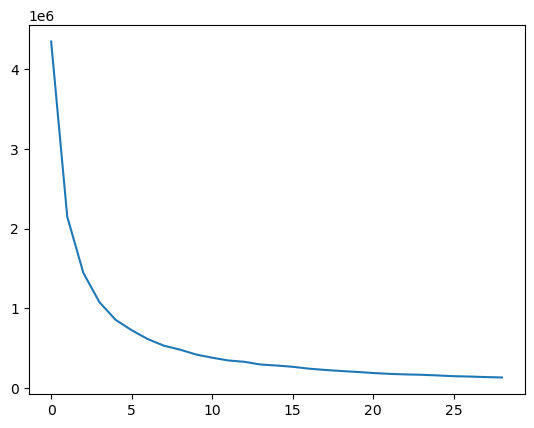

In [30]:
plt.plot(fs_list)

In [53]:
R = ring.R_n_S(10, 10, 5)
for i in range(10):
    Rc = R.copy()
    print(ring.RQ(Rc), Rc, ring.Entropy(Rc))

(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194
(95, 1532) [0, 1, 1, 0, 1, 0, 0, 1, 0, 1] -194


In [11]:
print(ring.Entropy(Rc))

-66
